# NLP _ SENTIMENT ANALYSIS ON PRODUCT REVIEWS


This dataset contains several million reviews of Amazon products, with the reviews separated into two classes for positive and negative reviews. The two classes are evenly balanced here.

This is a large dataset so I am considering a part of data otherwise it will be computationally exoensive, and the version that I am using here only has the text as a feature with no other metadata. This makes this an interesting dataset for doing NLP work. It is data written by users, so it's like that there are various typos, nonstandard spellings, and other variations that you may not find in curated sets of published text.

In [1]:
# importing necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.tokenize import WhitespaceTokenizer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import *
from nltk.stem.wordnet import WordNetLemmatizer
import warnings
from spellchecker import SpellChecker
from sklearn.feature_extraction.text import CountVectorizer
warnings.filterwarnings('ignore')

In [2]:
# checking the directory
import os
os.listdir()

['.ipynb_checkpoints', 'amazon_reviews.txt', 'snetiment_analysis.ipynb']

In [3]:
# Dataset - https://www.kaggle.com/vijay420/sentiment-analysis/notebook

# reading the dataset
amazon_review = pd.read_csv('amazon_reviews.txt',delimiter='\t',header=None, names=['review','sentiment'])
df = pd.read_csv('amazon_reviews.txt',delimiter='\t',header=None, names=['review','sentiment'])

In [4]:
# counting types of sentiments
df['sentiment'].value_counts()

0    500
1    500
Name: sentiment, dtype: int64

In [5]:
df['review'][3]

'Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!'

## Data Preprocessing

Pre processing the data as data contains many word with numberrs and special characters like ,',/ and numbers.If they are left as such,the vocabulary would count words like "it.",",the" and other stuffs like that.So it is better to remove the special characters from the data using regular expression and replace them with a empty space.

In [6]:
# ----- convert(didn't,did not)
# t = "At eight o'clock on Thursday morning Arthur didn't feel 95very good.95French-Fries"  
# At eight o'clock on Thursday morning Arthur did not feel 95very good.95French-Fries

# converting the apostrophy words in to the root words
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [7]:
# applying the decontracted function on the sentiments 
df['review'] = df['review'].apply(decontracted)

In [8]:
df['review'][3]

'Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!'

In [9]:
#remove words and digits like noon65, or 6.
def rem_wor_dig(text):
    output = ''.join(c for c in text if not c.isdigit())
    return(output)

In [10]:
df['review'] = df['review'].apply(rem_wor_dig)

In [11]:
df['review'][3]

'Tied to charger for conversations lasting more than  minutes.MAJOR PROBLEMS!!'

In [12]:
# removing puncuation
def rem_punc(text):
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text)
    return " ".join(tokens)

In [13]:
df['review'] = df['review'].apply(rem_punc)

In [14]:
df['review'][3]

'Tied to charger for conversations lasting more than minutes MAJOR PROBLEMS'

In [15]:
df['review'] = df['review'].apply(str. lower)

In [16]:
# creating a custom stopwords list so as to maintain the negative reviews
stopwords = ['from', "she's", 'theirs', 'be', 'won', 'shouldn', 'should', 'or', 'were', 'she', "shouldn't", 'until', 'himself', 'd', 'at', 'than', 'aren', "doesn't", 've', 'o', 'mustn', "you've", 'ours', 'wasn', 'but', 'once', 'there', "didn't", 'we', 'has', 'am', 'of', 'own', "you'd", 'in', 'he', "shan't", "mightn't", "don't", 'having', 'with', 'my', 'its', 'had', 'y', 'yourselves', 'didn', 'your', 'each', "haven't", 'yourself', 'and', 'is', 'nor', 'who', 'whom', 'couldn', 'this', 'mightn', 'shan', 'have', 'for', 'her', 'hers', 'other', 'during', 'herself', 'themselves', 'here', 'them', 's', 'hadn', "it's", 'so', "mustn't", 'did', 'about', 'after', "hadn't", 'haven', "you'll", 'can', 'just', 'isn', 'the', 'our', 'by', 'further', 'do', 'on', 're', 'doing', "aren't", 'off', 'some', 'an', 'only', 'over', 'me', 'while', 'will', 'too', 'i', 'under', 'more', "you're", 'their', 'you', 'as', 'ourselves', 'both', 'where', 'then', "hasn't", "weren't", "won't", 'before', 'are', "wouldn't", 'needn', 'because', 'doesn', 'into', 'that', 'between', "wasn't", 'it', 'him', 'up', 'above', 'his', 'these', 'm', 'been', "couldn't", 'to', 'those', 'same', 'don', 'out', 'ma', 'below', 'being', 'such', 'what', 'wouldn', "that'll", 'itself', 'hasn', "isn't", 'again', 'through', 'very', 'll', 'which', 'when', "should've", 'any', 't', 'how', 'all', "needn't", 'yours', 'weren', 'myself', 'a', 'they', 'if', 'ain', 'does', 'was', 'now', 'most', 'why']

In [17]:
# lemmantizing and removing stopwords from custom list
lemmatizer = WordNetLemmatizer()
def remove_stopwords(text):
    text_tokens = word_tokenize(text)
    tokens_without_sw = [lemmatizer.lemmatize(word) for word in text_tokens if not word in stopwords]
    return(tokens_without_sw)

In [18]:
df['review'] = df['review'].apply(remove_stopwords)

In [19]:
df['review'][3]

['tied', 'charger', 'conversation', 'lasting', 'minute', 'major', 'problem']

In [20]:
def join_word(text):
    s = ' '.join(word for word in text)
    return(s)

In [21]:
df['review'] = df['review'].apply(join_word)

In [22]:
df

,review,sentiment
0,no way plug u unless go converter,0
1,good case excellent value,1
2,great jawbone,1
3,tied charger conversation lasting minute major...,0
4,mic great,1
...,...,...
995,screen get smudged easily touch ear face,0
996,piece junk lose call phone,0
997,item not match picture,0
998,thing disappoint infra red port irda,0


## Count Vectorizer

In [23]:
# using bag of words model count vectorizer
coun_vect = CountVectorizer()
count_matrix = coun_vect.fit_transform(df['review'])
count_array = count_matrix.toarray()
X_countvectorizer = pd.DataFrame(data=count_array,columns = coun_vect.get_feature_names())
print (X_countvectorizer.shape)

(1000, 1564)


In [24]:
y = df['sentiment']

## Splitting the data 

In [25]:
from sklearn.model_selection import train_test_split
X_train_cv,X_test_cv,y_train_cv,y_test_cv=train_test_split(X_countvectorizer,y,test_size=0.3,random_state=40,stratify=y)

In [27]:
print(X_train_cv.shape,X_test_cv.shape,y_train_cv.shape,y_test_cv.shape)

(700, 1564) (300, 1564) (700,) (300,)


Naive Bayes, SVM, Logistic Regression and LSTM

## Training on Machine learning Algorithms
### RANDOM FOREST

In [28]:
# Random Forest Classifier
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
model_rf = RandomForestClassifier(random_state= 42)  

scoring = {"Recall": 'recall', "Accuracy": 'accuracy'}

cv = StratifiedKFold(n_splits= 10, shuffle=True, random_state=1)
parameter = {
             'n_estimators': [100,200],
             'max_depth' : [4,5,6,7],
             'criterion' :['gini', 'entropy'],
             'min_samples_leaf': [3, 4, 5],
             'min_samples_split': [8, 10, 12],
             'bootstrap': [True, False] # boot straping method is used to build the tree rather than using whole dataset

            }

result_rf = GridSearchCV(estimator = model_rf, 
                         param_grid = parameter, 
                         cv = cv, 
                         scoring= scoring,
                         refit="Recall", #refits with the parameter setting that has the best cross-validated score.
                         n_jobs = -1, #means using all processors
                         return_train_score =False # to get insights on how different parameter settings impact the overfitting/underfitting trade-off.
                        )

result_rf.fit(X_train_cv, y_train_cv)
print(result_rf.best_params_)
print(result_rf.best_score_)

{'bootstrap': False, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 8, 'n_estimators': 100}
0.7


In [29]:
y_pred_rf = result_rf.predict(X_test_cv)

In [31]:
from sklearn.metrics import fbeta_score
fb_rf = fbeta_score(y_test_cv, y_pred_rf, beta=1)
fb_rf

0.7380952380952381

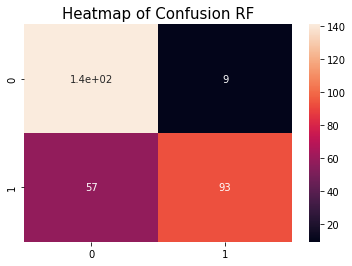

In [32]:
from sklearn.metrics import confusion_matrix
cm_rf = confusion_matrix(y_test_cv, y_pred_rf)
plt.title('Heatmap of Confusion RF', fontsize = 15)
sns.heatmap(cm_rf, annot = True)
plt.show()

In [34]:
def print_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    print('True positive = ', cm[0][0])
    print('False positive = ', cm[1][0])
    print('False negative = ', cm[0][1])
    print('True negative = ', cm[1][1])

In [35]:
print_confusion_matrix(y_test_cv, y_pred_rf)

True positive =  141
False positive =  57
False negative =  9
True negative =  93


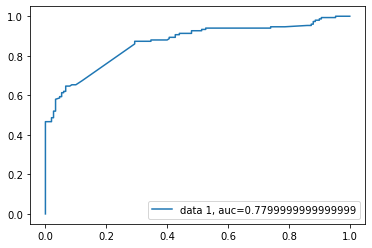

In [68]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr, tpr, _ = roc_curve(y_test_cv, y_pred_proba_rf)
auc = roc_auc_score(y_test_cv, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [69]:
y_pred_proba_rf = (result_rf.predict_proba(X_test_cv)[:,1] >= 0.5).astype(bool)


cm = confusion_matrix(y_test_cv, y_pred_proba)
print('True positive = ', cm[0][0])
print('False positive = ', cm[1][0])
print('False negative = ', cm[0][1])
print('True negative = ', cm[1][1])

True positive =  141
False positive =  57
False negative =  9
True negative =  93


### NAIVE BAYES

In [39]:
X_train_nb,X_test_nb,y_train_nb,y_test_nb=train_test_split(X_countvectorizer,y,test_size=0.3,random_state=40,stratify=y)

In [70]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model_nb = GaussianNB()

# Train the model using the training sets
model_nb.fit(X_train_nb,y_train_nb)

GaussianNB()

In [71]:
y_pred_nb = model_nb.predict(X_test_cv)

In [72]:
fb_rf = fbeta_score(y_test_cv, y_pred_nb, beta=1)
fb_rf

0.7411764705882353

True positive =  86
False positive =  24
False negative =  64
True negative =  126
None


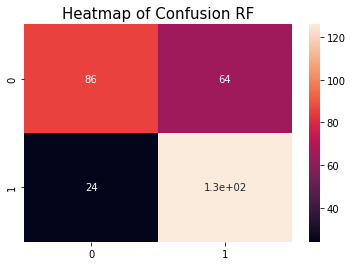

In [73]:
print(print_confusion_matrix(y_test_cv, y_pred_nb))

cm_rf = confusion_matrix(y_test_cv, y_pred_nb)
plt.title('Heatmap of Confusion RF', fontsize = 15)
sns.heatmap(cm_rf, annot = True)
plt.show()

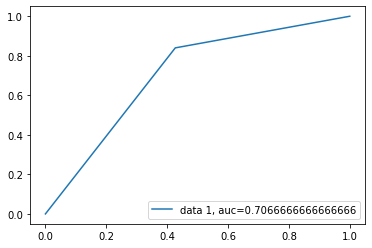

In [76]:
fpr, tpr, _ = roc_curve(y_test_cv, y_pred_nb)
auc = roc_auc_score(y_test_cv, y_pred_nb)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### SVC

In [81]:
from sklearn.svm import SVC
model_svm = SVC(random_state = 42)

In [87]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
result_svm = GridSearchCV(estimator = model_svm,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
result_svm.fit(X_train_cv, y_train_cv)

print(result_svm.best_params_)
print(result_svm.best_score_)

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
0.8


In [88]:
y_pred_svm = result_svm.predict(X_test_cv)

In [89]:
fb_rf = fbeta_score(y_test_cv, y_pred_svm, beta=1)
fb_rf

0.8137931034482757

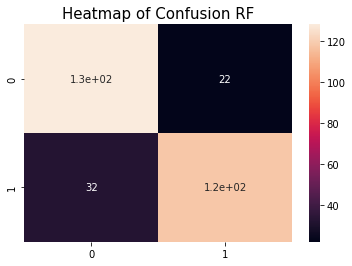

In [90]:
cm_rf = confusion_matrix(y_test_cv, y_pred_svm)
plt.title('Heatmap of Confusion RF', fontsize = 15)
sns.heatmap(cm_rf, annot = True)
plt.show()

In [91]:
print_confusion_matrix(y_test_cv, y_pred_svm)

True positive =  128
False positive =  32
False negative =  22
True negative =  118


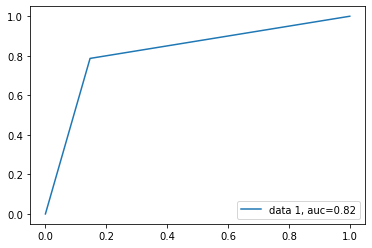

In [93]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr, tpr, _ = roc_curve(y_test_cv, y_pred_svm)
auc = roc_auc_score(y_test_cv, y_pred_svm)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Decision tree classifier

In [98]:
# Necessary imports
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
  
# Creating the hyperparameter grid 
param_dist = {"max_depth": [3, None],
              "max_features": [1,2,3,4,5,6],
              "min_samples_leaf": [1,2,3,4,5,6],
              "criterion": ["gini", "entropy"]}
  
# Instantiating Decision Tree classifier
model_DT = DecisionTreeClassifier()
  
# Instantiating RandomizedSearchCV object
result_dt = GridSearchCV(model_DT, param_dist, cv = 5)
  
result_dt.fit(X_train_cv, y_train_cv)
  
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(result_dt.best_params_))
print("Best score is {}".format(result_dt.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 5, 'min_samples_leaf': 1}
Best score is 0.7042857142857144


In [99]:
y_pred_dt = result_dt.predict(X_test_cv)

In [100]:
fb_rf = fbeta_score(y_test_cv, y_pred_dt, beta=1)
fb_rf

0.7098765432098766

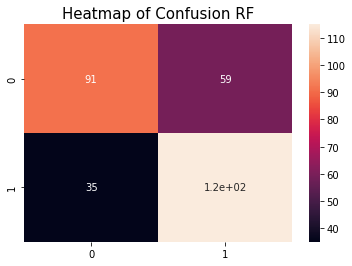

In [101]:
cm_rf = confusion_matrix(y_test_cv, y_pred_dt)
plt.title('Heatmap of Confusion RF', fontsize = 15)
sns.heatmap(cm_rf, annot = True)
plt.show()

In [102]:
print_confusion_matrix(y_test_cv, y_pred_dt)

True positive =  91
False positive =  35
False negative =  59
True negative =  115


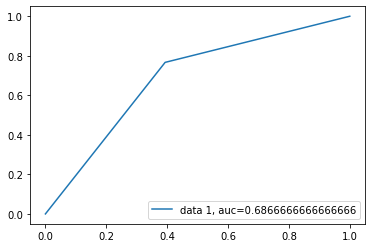

In [103]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr, tpr, _ = roc_curve(y_test_cv, y_pred_dt)
auc = roc_auc_score(y_test_cv, y_pred_dt)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Logistic regression

In [105]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()

In [111]:
cv = StratifiedKFold(n_splits= 10, shuffle=True, random_state=100)

paramgrid = {
    'penalty':['l1', 'l2', 'elasticnet'],        # l1 is Lasso, l2 is Ridge
    'solver':['newton-cg', 'lbfgs', 'liblinear'],
    'C': np.linspace(0.00002,1,100)
    }

result_lr = GridSearchCV(estimator=model_lr, param_grid=paramgrid, n_jobs=-1, cv=cv, scoring='accuracy')
result_lr.fit(X_train_cv, y_train_cv)

print ("Best Params", result_lr.best_params_)
print ("Best Score", result_lr.best_score_)

Best Params {'C': 0.3636490909090909, 'penalty': 'l2', 'solver': 'newton-cg'}
Best Score 0.7971428571428572


In [112]:
y_pred_lr = result_lr.predict(X_test_cv)

In [113]:
fb_rf = fbeta_score(y_test_cv, y_pred_lr, beta=1)
fb_rf

0.7777777777777779

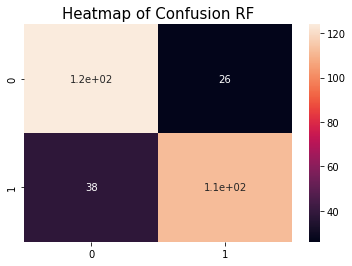

In [114]:
cm_rf = confusion_matrix(y_test_cv, y_pred_lr)
plt.title('Heatmap of Confusion RF', fontsize = 15)
sns.heatmap(cm_rf, annot = True)
plt.show()

In [115]:
print_confusion_matrix(y_test_cv, y_pred_lr)

True positive =  124
False positive =  38
False negative =  26
True negative =  112


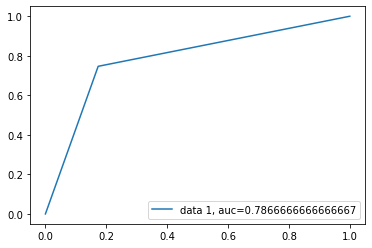

In [116]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr, tpr, _ = roc_curve(y_test_cv, y_pred_lr)
auc = roc_auc_score(y_test_cv, y_pred_lr)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Results - Support Vector Classifier performed well in this case with 83% accuracy. This can be firthur improved using large dataset.